<a href="https://colab.research.google.com/github/AravindBethapudi/Titanic/blob/main/Titanic_survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv("/content/train.csv")
df2 = pd.read_csv("/content/test (1).csv")

In [3]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(df1.info())
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [5]:
print(df1.isnull().sum()/len(df1)*100)
print(df2.isnull().sum()/len(df2)*100)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64
PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64


In [6]:
df1['Age'].fillna(df1['Age'].mean(),inplace=True)
df2['Age'].fillna(df2['Age'].mean(),inplace=True)
df1.drop(['Cabin','Embarked'],axis=1,inplace=True)
df2.drop(['Cabin','Embarked'],axis=1,inplace=True)
df2['Fare'].fillna(df2['Fare'].mean(),inplace=True)

<ipython-input-6-e6ad5dbe7774>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Age'].fillna(df1['Age'].mean(),inplace=True)
<ipython-input-6-e6ad5dbe7774>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [7]:
df1.isnull().sum()
df2.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
print(df1.head())
print(df2.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare  
0      0         A/5 21171   7.2500  
1      0          PC 17599  71.2833  
2      0  STON/O2. 3101282   7.9250  
3      0            113803  53.1000  
4      0            373450   8.0500  
   PassengerId  Pclass                                          Name     Sex  \
0          8

In [9]:
df1['familysize'] = df1['SibSp']+df1['Parch']+1
df2['familysize'] = df2['SibSp']+df2['Parch']+1


In [10]:
df1['Alone'] = (df1['familysize']== 1).astype(int)
df2['Alone'] = (df2['familysize']== 1).astype(int)

In [11]:
# Extract titles from the 'Name' column
df1['Title'] = df1['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df2['Title'] = df2['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Simplify titles into broader categories
title_mapping = {
    "Mr": "Mr", "Miss": "Miss", "Mrs": "Mrs", "Master": "Master",
    "Dr": "Rare", "Rev": "Rare", "Col": "Rare", "Major": "Rare",
    "Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs", "Countess": "Rare",
    "Lady": "Rare", "Sir": "Rare", "Jonkheer": "Rare", "Don": "Rare", "Capt": "Rare"
}
df1['Title'] = df1['Title'].map(title_mapping)
df2['Title'] = df2['Title'].map(title_mapping)


In [12]:
df1['AgeBin'] = pd.cut(df1['Age'],bins=[0,12,20,40,60,80],labels = ['child','teen','Adult','middle aged','old'])
df2['AgeBin'] = pd.cut(df2['Age'],bins=[0,12,20,40,60,80],labels = ['child','teen','Adult','middle aged','old'])

In [13]:
# Bin 'Fare' into categories
df1['FareBin'] = pd.qcut(df1['Fare'], 4, labels=['Low', 'Mid', 'High', 'Very High'])
df2['FareBin'] = pd.qcut(df2['Fare'], 4, labels=['Low', 'Mid', 'High', 'Very High'])

In [14]:
df1 = pd.get_dummies(df1, columns= ['Sex','Title','AgeBin','FareBin'],drop_first=True)
df2 = pd.get_dummies(df2, columns= ['Sex','Title','AgeBin','FareBin'],drop_first=True)

In [15]:
df1.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,familysize,...,Title_Mr,Title_Mrs,Title_Rare,AgeBin_teen,AgeBin_Adult,AgeBin_middle aged,AgeBin_old,FareBin_Mid,FareBin_High,FareBin_Very High
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,2,...,True,False,False,False,True,False,False,False,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,2,...,False,True,False,False,True,False,False,False,False,True
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,...,False,False,False,False,True,False,False,True,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,2,...,False,True,False,False,True,False,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,...,True,False,False,False,True,False,False,True,False,False


In [16]:
df1.drop(['Name','Ticket'],axis=1,inplace=True)

In [17]:
from sklearn.model_selection import train_test_split

X = df1.drop(['Survived','PassengerId'],axis=1)
y = df1['Survived']
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size= 0.2,random_state=42)

In [18]:
X

,Pclass,Age,SibSp,Parch,Fare,familysize,Alone,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,AgeBin_teen,AgeBin_Adult,AgeBin_middle aged,AgeBin_old,FareBin_Mid,FareBin_High,FareBin_Very High
0,3,22.000000,1,0,7.2500,2,0,True,False,True,False,False,False,True,False,False,False,False,False
1,1,38.000000,1,0,71.2833,2,0,False,False,False,True,False,False,True,False,False,False,False,True
2,3,26.000000,0,0,7.9250,1,1,False,True,False,False,False,False,True,False,False,True,False,False
3,1,35.000000,1,0,53.1000,2,0,False,False,False,True,False,False,True,False,False,False,False,True
4,3,35.000000,0,0,8.0500,1,1,True,False,True,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1,1,True,False,False,False,True,False,True,False,False,True,False,False
887,1,19.000000,0,0,30.0000,1,1,False,True,False,False,False,True,False,False,False,False,True,False
888,3,29.699118,1,2,23.4500,4,0,False,True,False,False,False,False,True,False,False,False,True,False
889,1,26.000000,0,0,30.0000,1,1,True,False,True,False,False,False,True,False,False,False,True,False


In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_val)

from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_val, y_pred)
print("Classification Report:\n", class_report)

roc_auc = roc_auc_score(y_val,y_pred)
print("ROC AUC SCORE:\n", roc_auc)

Confusion Matrix:
 [[87 18]
 [21 53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.72      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

ROC AUC SCORE:
 0.7723938223938223


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5,random_state=42)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_val)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_val, y_pred)
print("Classification Report:\n", class_report)


roc_auc = roc_auc_score(y_val,y_pred)
print("ROC AUC SCORE:\n", roc_auc)

Confusion Matrix:
 [[93 12]
 [17 57]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       105
           1       0.83      0.77      0.80        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

ROC AUC SCORE:
 0.8279922779922779


In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced',n_estimators=100,max_depth=5,random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_val)

conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_val, y_pred)
print("Classification Report:\n", class_report)


roc_auc = roc_auc_score(y_val,y_pred)
print("ROC AUC SCORE:\n", roc_auc)

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [50,100,200],
    'max_depth': [5,10,20],
    'min_samples_split': [2,5,10]
}

grid_search = GridSearchCV(estimator =rf, param_grid=param_grid, scoring='accuracy', cv= 5,verbose=1)
grid_search.fit(X_train,y_train)

print("Best Params:", grid_search.best_params_)
print("Best Accuracy",grid_search.best_score_)


Confusion Matrix:
 [[91 14]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179

ROC AUC SCORE:
 0.8049549549549551
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy 0.8300502314586822


In [25]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_val)

conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_val, y_pred)
print("Classification Report:\n", class_report)

xgb_prob = xgb.predict_proba(X_val)[:,1]

xgb_roc_auc = roc_auc_score(y_val,xgb_prob)
print("ROC AUC SCORE:\n", roc_auc)

xgb_accuracy = accuracy_score(y_val,y_pred)
print(xgb_accuracy)


Confusion Matrix:
 [[90 15]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

ROC AUC SCORE:
 0.8049549549549551
0.8044692737430168


In [26]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scalar = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

model = SVC(kernel="linear",random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_val)
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_val, y_pred)
print("Classification Report:\n", class_report)


roc_auc = roc_auc_score(y_val,y_pred)
print("ROC AUC SCORE:\n", roc_auc)

Confusion Matrix:
 [[11 94]
 [ 2 72]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.10      0.19       105
           1       0.43      0.97      0.60        74

    accuracy                           0.46       179
   macro avg       0.64      0.54      0.39       179
weighted avg       0.68      0.46      0.36       179

ROC AUC SCORE:
 0.5388674388674388


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_val)

conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_val, y_pred)
print("Classification Report:\n", class_report)


roc_auc = roc_auc_score(y_val,y_pred)
print("ROC AUC SCORE:\n", roc_auc)

Confusion Matrix:
 [[  0 105]
 [  0  74]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       105
           1       0.41      1.00      0.58        74

    accuracy                           0.41       179
   macro avg       0.21      0.50      0.29       179
weighted avg       0.17      0.41      0.24       179

ROC AUC SCORE:
 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samp

In [28]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# Initialize and train LightGBM
lgbm_model = LGBMClassifier(random_state=42, n_estimators=100, max_depth=5, learning_rate=0.1)
lgbm_model.fit(X_train, y_train)

# Predict and evaluate
lgbm_pred = lgbm_model.predict(X_val)
lgbm_pred_proba = lgbm_model.predict_proba(X_val)[:, 1]

# Metrics
lgbm_accuracy = accuracy_score(y_val, lgbm_pred)
lgbm_auc = roc_auc_score(y_val, lgbm_pred_proba)

print(f"LightGBM Accuracy: {lgbm_accuracy:.4f}")
print(f"LightGBM AUC: {lgbm_auc:.4f}")

param_grid ={
    'n_estimators':[50,100,200],
    'max_depth':[5,10,20],
    'learning':[0.01,0.1,0.2]
}

grid_search = GridSearchCV(estimator=lgbm_model,param_grid=param_grid,scoring='roc_auc',cv=5,verbose=1)
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)



/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [29]:
!pip install catboost

from catboost import CatBoostClassifier

# Initialize and train CatBoost
cat_model = CatBoostClassifier(random_state=42, iterations=100, depth=5, learning_rate=0.1, verbose=0)
cat_model.fit(X_train, y_train)

# Predict and evaluate
cat_pred = cat_model.predict(X_val)
cat_pred_proba = cat_model.predict_proba(X_val)[:, 1]

# Metrics
cat_accuracy = accuracy_score(y_val, cat_pred)
cat_auc = roc_auc_score(y_val, cat_pred_proba)

print(f"CatBoost Accuracy: {cat_accuracy:.4f}")
print(f"CatBoost AUC: {cat_auc:.4f}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.3 MB/s eta 0:00:00
CatBoost Accuracy: 0.7821
CatBoost AUC: 0.8137


In [30]:
results = {
    "Model": ["XGBoost", "LightGBM", "CatBoost"],
    "Accuracy": [xgb_accuracy, lgbm_accuracy, cat_accuracy],
    "AUC": [
xgb_roc_auc, lgbm_auc, cat_auc]
}

results_df = pd.DataFrame(results)
print(results_df)

      Model  Accuracy       AUC
0   XGBoost  0.804469  0.885457
1  LightGBM  0.770950  0.790219
2  CatBoost  0.782123  0.813707


In [31]:
X_val= X_val.astype(float)

In [32]:
import numpy as np
np.isnan(X_val).sum()

0

In [33]:
X_train = X_train.astype(int)

In [34]:
best_model = grid_search.best_estimator_
feature_importances =best_model.feature_importances_


for name,importance in zip(X_train.columns,feature_importances):
   print(f"{name}: {importance}")


Pclass: 76
Age: 740
SibSp: 59
Parch: 52
Fare: 924
familysize: 74
Alone: 7
Sex_male: 54
Title_Miss: 29
Title_Mr: 44
Title_Mrs: 32
Title_Rare: 0
AgeBin_teen: 6
AgeBin_Adult: 33
AgeBin_middle aged: 7
AgeBin_old: 0
FareBin_Mid: 57
FareBin_High: 17
FareBin_Very High: 0


In [35]:
# Example: Assuming test_data is a DataFrame
X_test = df2.drop(['PassengerId'], axis=1)  # Drop unnecessary columns (e.g., IDs)




# Ensure test data columns match training data columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [36]:
# Define features for the test set
X_test = df2.drop(['PassengerId'], axis=1)  # Drop unnecessary columns

# Preprocess test data

X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Make predictions
y_test_pred = best_model.predict(X_test)

# Prepare submission file
submission = pd.DataFrame({
    'PassengerId': df2['PassengerId'],  # Use the original PassengerId from test data
    'Survived': y_test_pred
})
submission.to_csv('submission.csv', index=False)
print("Submission file created: 'submission.csv'")


[LightGBM] [Warning] Unknown parameter: learning
Submission file created: 'submission.csv'


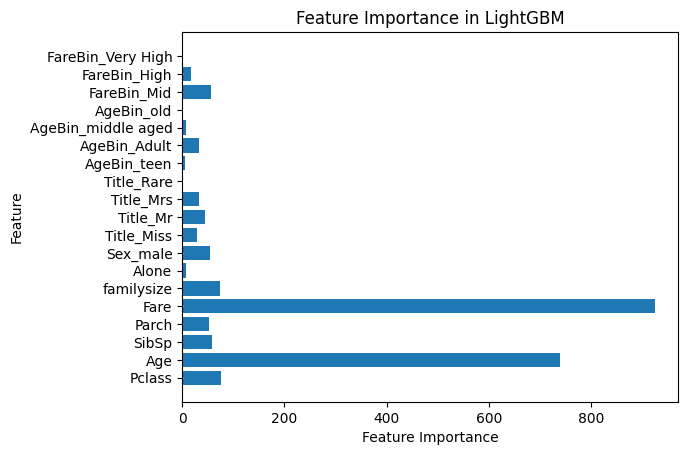

In [37]:
import matplotlib.pyplot as plt

# Feature importance plot
feature_importances = best_model.feature_importances_
plt.barh(X_train.columns, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in LightGBM")
plt.show()


In [38]:
import joblib

# Save the model to a file
joblib.dump(best_model, 'lightgbm_model.pkl')

# Load the model later
loaded_model = joblib.load('lightgbm_model.pkl')


In [39]:
# Prepare submission file
submission = pd.DataFrame({
    'PassengerId': df2['PassengerId'],  # Use the original PassengerId from test data
    'Survived': y_test_pred
})
submission.to_csv('submission.csv', index=False)
print("Submission file created: 'submission.csv'")


Submission file created: 'submission.csv'
